___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [4]:
customers = pd.read_csv('data/Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [8]:
customers.head()
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [11]:
sns.jointplot(data = customers, x = 'Time on Website', y = 'Yearly Amount Spent')

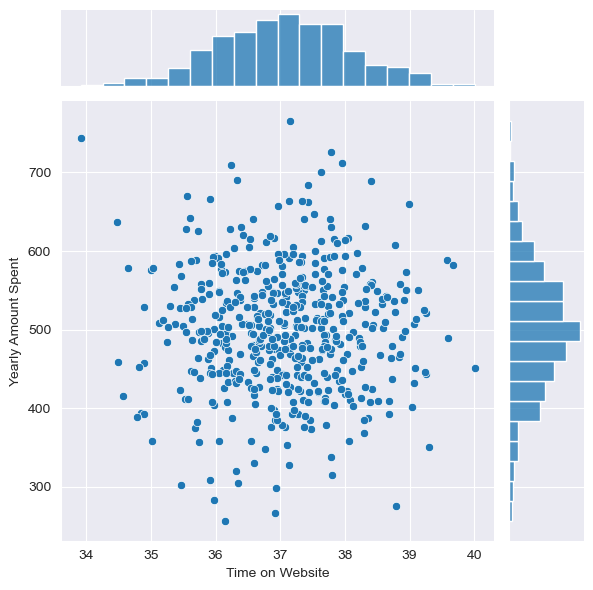

In [12]:
plt.show()

** Do the same but with the Time on App column instead. **

In [71]:
sns.jointplot(data = customers, x = 'Time on Website', y = 'Time on App')

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

In [70]:
sns.jointplot(data=customers, x = 'Time on App', y = 'Length of Membership', kind='hex')

**Let's explore these types of relationships across the entire data set.

In [69]:
sns.pairplot(data = customers)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [285]:
# Length of membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

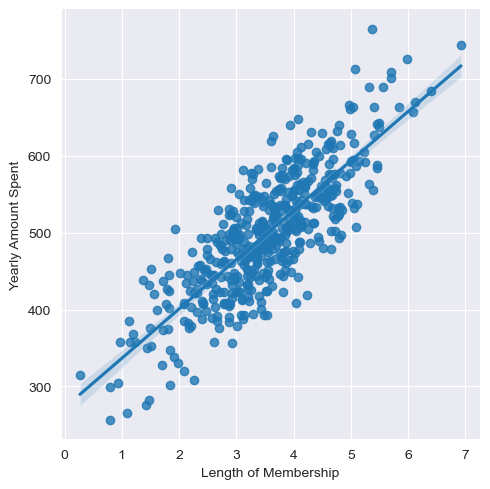

In [24]:
sns.lmplot(x='Length of Membership', y = 'Yearly Amount Spent',data = customers)
plt.show()

## Training and Testing Data
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [43]:
customers.columns
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

In [44]:
y = customers['Yearly Amount Spent']

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

** Import LinearRegression from sklearn.linear_model **

In [47]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [48]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [49]:
lm.fit(X_train, y_train)

LinearRegression()

In [50]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values.

In [52]:
predictions = lm.predict(X_test)

** Scatterplot of the real test values versus the predicted values. **

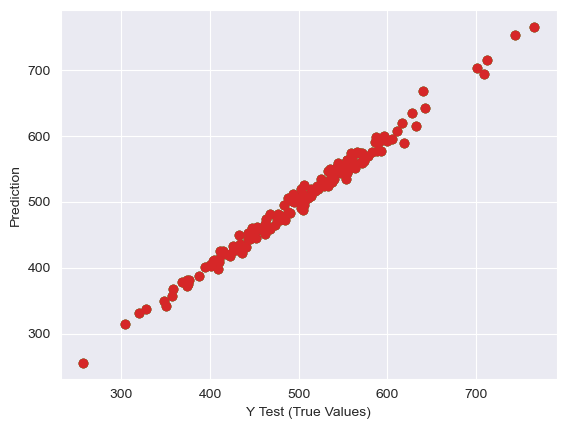

In [57]:
plt.scatter(y_test, predictions)
plt.xlabel("Y Test (True Values)")
plt.ylabel("Prediction")
plt.show()

## Evaluating the Model

In [63]:
from sklearn import metrics

print('MAE ', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('Variance Score', metrics.explained_variance_score(y_test, predictions))


MAE  7.2281486534308295
MSE 79.8130516509744
RMSE 8.933815066978632
Variance Score 0.9890771231889606


## Residuals

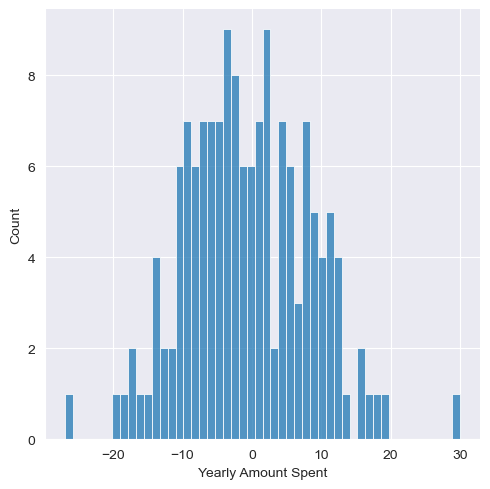

In [67]:
sns.displot((y_test - predictions), bins = 50)
plt.show()

## Conclusion

In [68]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
cdf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


*Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **Avg. Session Length** is associated with an **increase of 25.98 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on App** is associated with an **increase of 38.59 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Time on Website** is associated with an **increase of 0.19 total dollars spent**.
- Holding all other features fixed, a 1 unit increase in **Length of Membership** is associated with an **increase of 61.27 total dollars spent**.*

**Do you think the company should focus more on their mobile app or on their website?**

*The company should invest in their mobile app rather than the website*